In [1]:
# Exercise 1
import pandas
import keras
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Activation, Dense, Dropout

from keras.layers import Dense, LSTM, Dropout, Bidirectional, Embedding

from keras.models import Sequential
from keras import optimizers, regularizers
import matplotlib.pyplot as plt

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model



Using TensorFlow backend.


In [2]:
def load_dataset():
    dataset = load_files('dataset/txt_sentoken/', shuffle=False)
    X_train, X_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=42)
    print('\nTraining samples {}, test_samples {}:'.format(len(X_train), len(X_test)))
   
    vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english', max_df=0.7, norm='l2', vocabulary=None)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train, X_test, y_train, y_test

In [3]:
def plot_history(history):
    
    %matplotlib inline
    plt.ioff()
    
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plot_loss = plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    #plt.savefig("plot_loss.png")
    
    plt.close(plot_loss)
    
    ## Accuracy
    plot_accuracy = plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
   
    #plt.savefig("plot_accuracy.png")
    #plt.close(plot_accuracy)

    # comment when run on queue
    plt.show()

In [4]:
X_train, X_test, y_train, y_test = load_dataset()


train_examples = X_train.shape[0]
input_size = X_train.shape[1]
test_examples = X_test.shape[0]


batch_size = 50
num_classes = 2
epochs = 10

print(train_examples)
print(test_examples)
print(input_size)


Training samples 1500, test_samples 500:
1500
500
416701


In [5]:
X_train = X_train.reshape(train_examples, input_size)
X_test = X_test.reshape(test_examples, input_size)

# model = Sequential()
# model.add(Dense(512, input_shape=(input_size,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1))
# model.add(Activation('softmax'))

model = Sequential()
model.add(Dense(512, input_shape=(input_size,)))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
      optimizer='adam', 
      metrics=['accuracy']) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               213351424 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 213,351,937
Trainable params: 213,351,937
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#plot_model(model, to_file='model.png')

# comment when run on queue
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [7]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1, );

Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 116s 77ms/step - loss: 0.6326 - acc: 0.6807 - val_loss: 0.4945 - val_acc: 0.8180
Epoch 2/10
1500/1500 [==============================] - 95s 64ms/step - loss: 0.0292 - acc: 1.0000 - val_loss: 0.4136 - val_acc: 0.8260
Epoch 3/10
1500/1500 [==============================] - 95s 63ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.4022 - val_acc: 0.8260
Epoch 4/10
1500/1500 [==============================] - 95s 63ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3969 - val_acc: 0.8320
Epoch 5/10
1500/1500 [==============================] - 95s 63ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3936 - val_acc: 0.8320
Epoch 6/10
1500/1500 [==============================] - 95s 63ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3914 - val_acc: 0.8320
Epoch 7/10
1500/1500 [==============================] - 95s 63ms/step - loss: 9.3129e-04 - acc: 1.0000 - val_loss: 0.3896 - val_acc: 0.8

In [8]:
scores = model.evaluate(X_test, y_test)

500/500 [==============================] - 6s 12ms/step


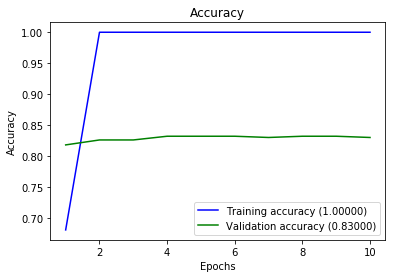

In [9]:
plot_history(hist) 

In [10]:
print('\n')
print('Loss:', scores[0])
print('Accuracy:', scores[1])



Loss: 0.3862413234710693
Accuracy: 0.8300000004768372


In [ ]:
predictions = model.predict(X_test)
prediction_int = [round(x[0]) for x in predictions]

In [ ]:
results = pandas.DataFrame(y_test, columns=['true_value'])
results.loc[:, 'prediction'] = predictions
results.loc[:, 'prediction_int'] = prediction_int
results.to_csv("predictions.csv",index=False)

In [ ]:
model.save_weights("model_weights.h5")

In [ ]:
model.save("model.h5")